In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
car_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_ids = test_df["id"]
car_df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54268,54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000
54269,54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500
54270,54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950
54271,54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965


In [3]:
test_df.shape

(36183, 12)

In [4]:
# check Missing value
car_df.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [5]:
# Check Duplication
car_df.duplicated().sum()

0

In [6]:
car_df.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [7]:
# Check the number of unique values of each column
car_df.nunique()

id              54273
brand              53
model            1827
model_year         34
milage           3212
fuel_type           7
engine           1061
transmission       46
ext_col           260
int_col           124
accident            2
clean_title         1
price            1481
dtype: int64

In [8]:
#Check statistics of data set
car_df.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06


In [9]:
car_df[car_df['price'] > 500000]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
722,722,Ferrari,Roma Base,2021,12500,Gasoline,611.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,None reported,Yes,599000
789,789,Mercedes-Benz,AMG C 43 Base 4MATIC,2017,80300,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,9-Speed A/T,Gray,Black,None reported,Yes,749950
1643,1643,Rolls-Royce,Cullinan,2023,17945,Gasoline,6.7L V12 48V GDI DOHC Twin Turbo,8-Speed Automatic,–,–,None reported,Yes,695000
2550,2550,Ford,Expedition Timberline,2023,8911,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Dark Matter Metallic,Black Onyx,None reported,Yes,749950
2568,2568,Porsche,911 GT3,2019,1568,Gasoline,475.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,1599000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51597,51597,Ford,Shelby GT500 Base,2023,2050,Gasoline,760.0HP 5.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,Black,None reported,Yes,599000
52848,52848,Chevrolet,Corvette Base,2005,13300,Gasoline,430.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,6-Speed M/T,Red,Beige,None reported,Yes,2954083
52955,52955,Rolls-Royce,Phantom,2023,1560,Gasoline,–,–,Tempest,Cobalt Blue,None reported,Yes,599995
53192,53192,Mercedes-Benz,Sprinter 3500 High Roof,2019,39000,Diesel,188.0HP 3.0L V6 Cylinder Engine Diesel Fuel,A/T,White,Black,At least 1 accident or damage reported,Yes,695000


In [10]:
categorical_columns = ['brand', 'model','fuel_type', 'engine', 'transmission','ext_col', 'int_col','accident','clean_title']
for col in categorical_columns:
    print(f"Category in {col} is : {car_df[col].unique()}")

Category in brand is : ['Ford' 'BMW' 'Jaguar' 'Pontiac' 'Acura' 'Audi' 'GMC' 'Maserati'
 'Chevrolet' 'Porsche' 'Mercedes-Benz' 'Tesla' 'Lexus' 'Kia' 'Lincoln'
 'Dodge' 'Volkswagen' 'Land' 'Cadillac' 'Mazda' 'RAM' 'Subaru' 'Hyundai'
 'MINI' 'Jeep' 'Honda' 'Hummer' 'Nissan' 'Toyota' 'Volvo' 'Genesis'
 'Mitsubishi' 'Buick' 'INFINITI' 'McLaren' 'Scion' 'Lamborghini' 'Bentley'
 'Suzuki' 'Ferrari' 'Alfa' 'Rolls-Royce' 'Chrysler' 'Aston' 'Rivian'
 'Lotus' 'Saturn' 'Lucid' 'Mercury' 'Maybach' 'FIAT' 'Plymouth' 'Bugatti']
Category in model is : ['F-150 Lariat' '335 i' 'XF Luxury' ... 'Q4 e-tron Sportback Premium'
 'Countryman Cooper' 'S-10 LS']
Category in fuel_type is : ['Gasoline' 'Hybrid' 'E85 Flex Fuel' 'Diesel' '–' 'Plug-In Hybrid'
 'not supported']
Category in engine is : ['375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel'
 '300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel'
 '300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel' ... '3.0L'
 '3.0 Liter GTDI' '120.0HP 2.2L 4 Cylinder Engine Flex 

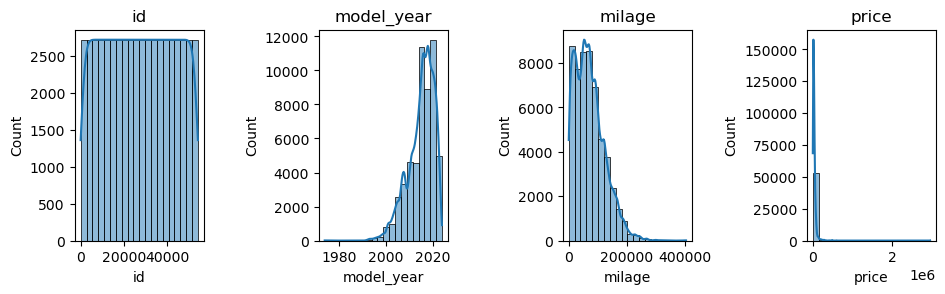

In [11]:
# Distribution of Numerical Features
numerical_features = ['id','model_year', 'milage','price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=car_df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

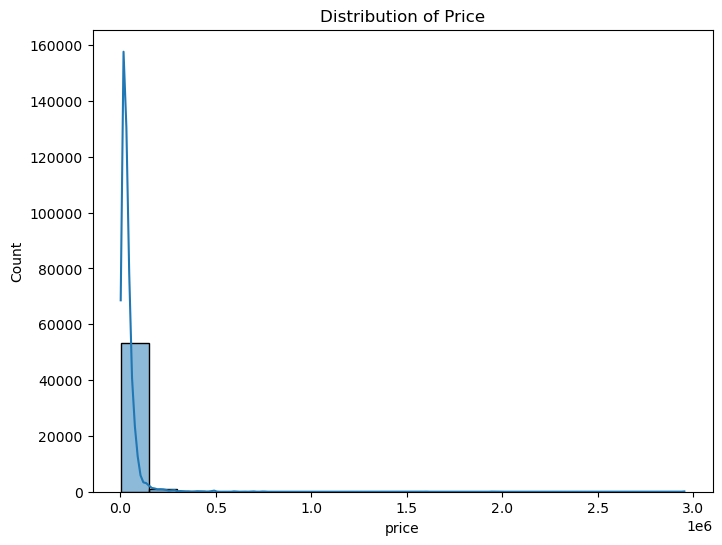

In [12]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=car_df['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

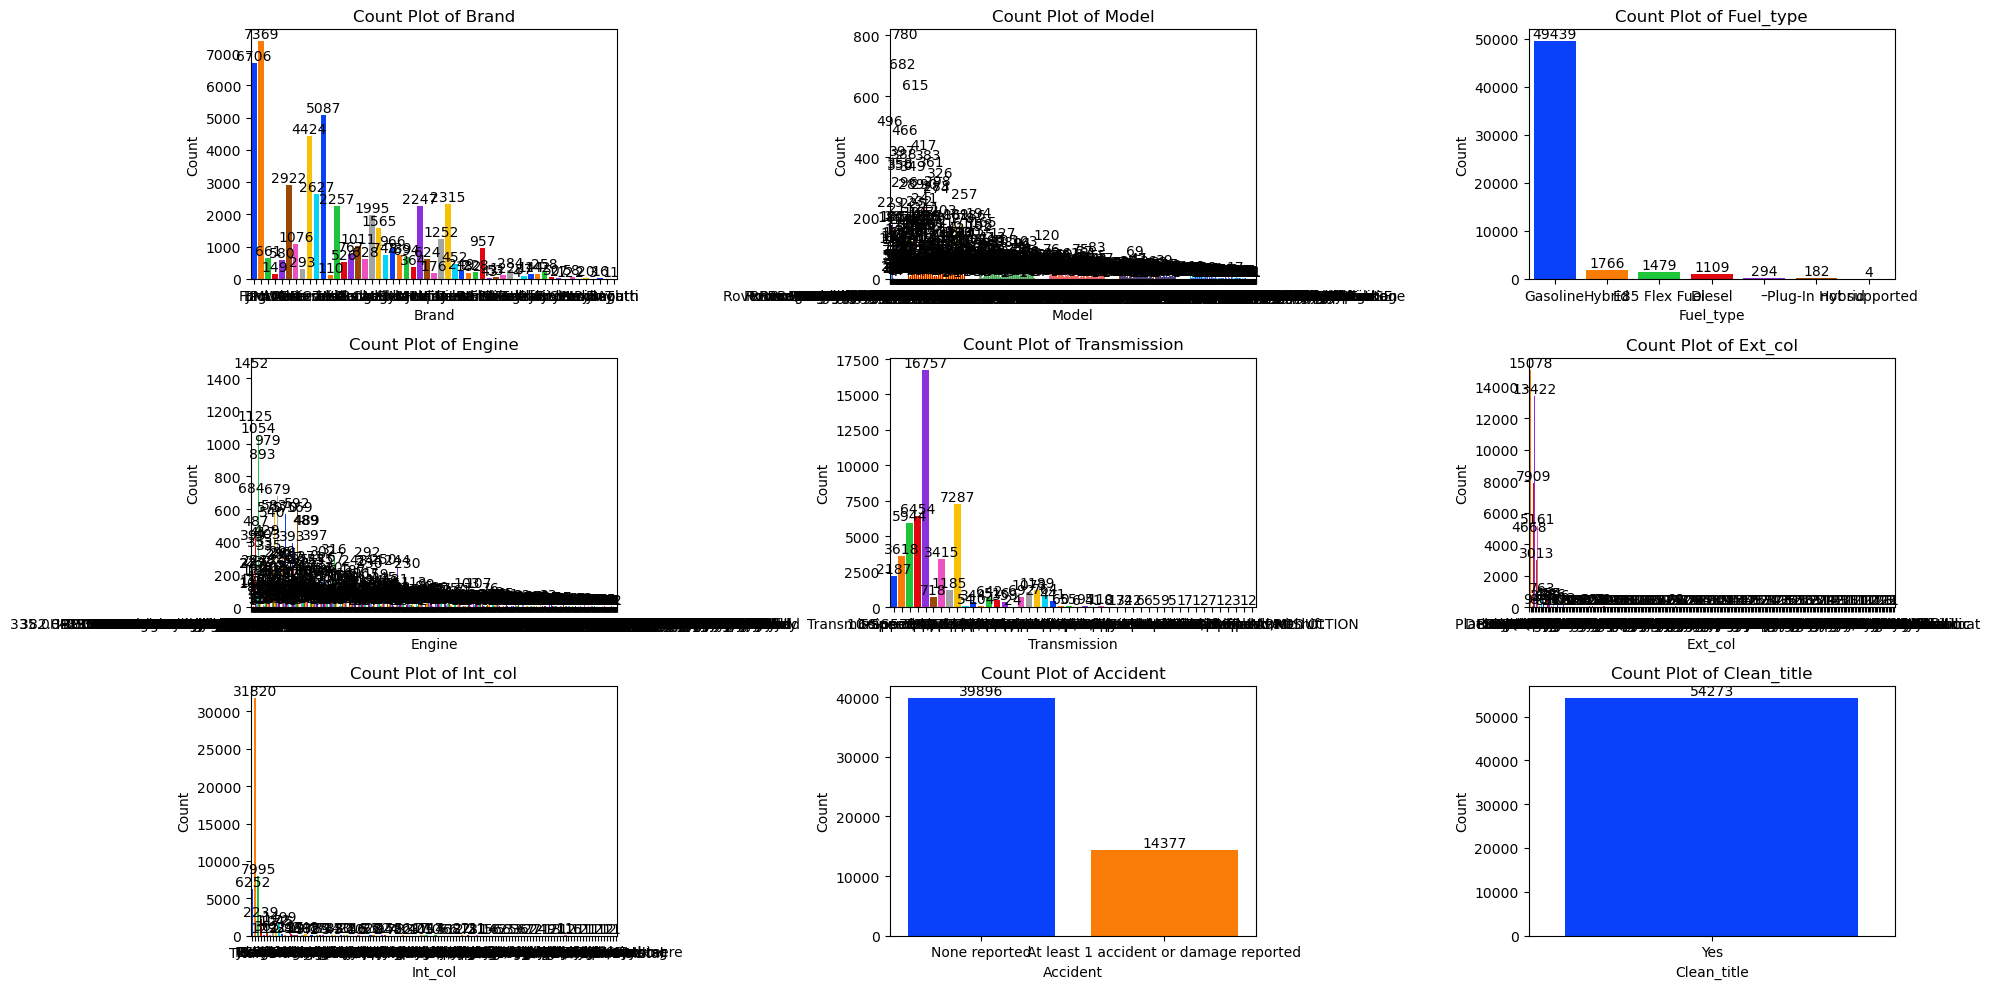

In [13]:
# Define the list of categorical columns to analyze
categorical_columns = ['brand', 'model','fuel_type', 'engine', 'transmission','ext_col', 'int_col','accident','clean_title']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=car_df[column], data=car_df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

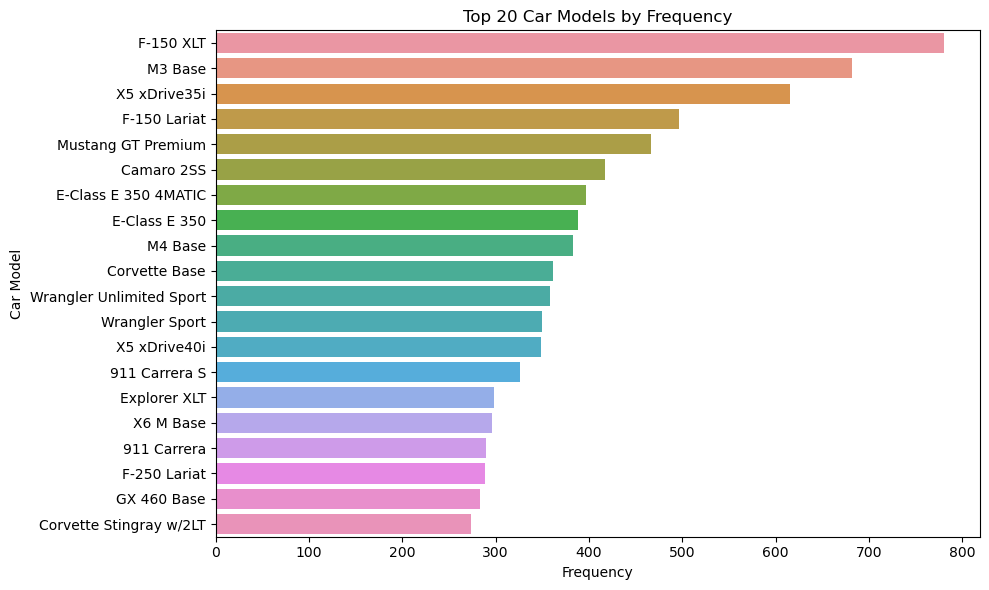

In [14]:
n = 20  # Number of top car models to plot
top_car_models = car_df['model'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

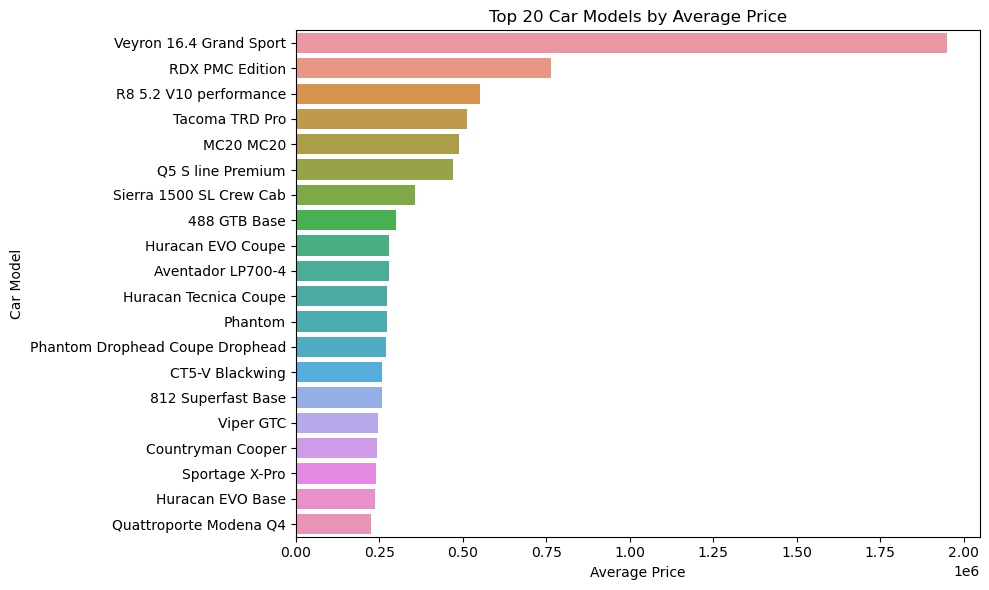

In [15]:
# Calculate average price for each car model
avg_prices_by_car = car_df.groupby('model')['price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

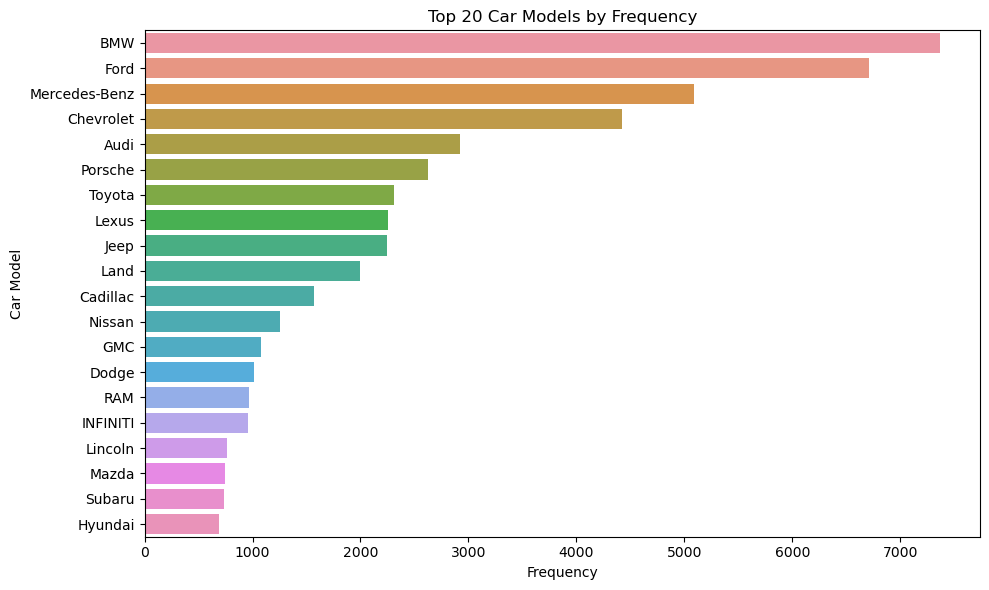

In [16]:
n = 20  # Number of top car brand to plot
top_car_models = car_df['brand'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

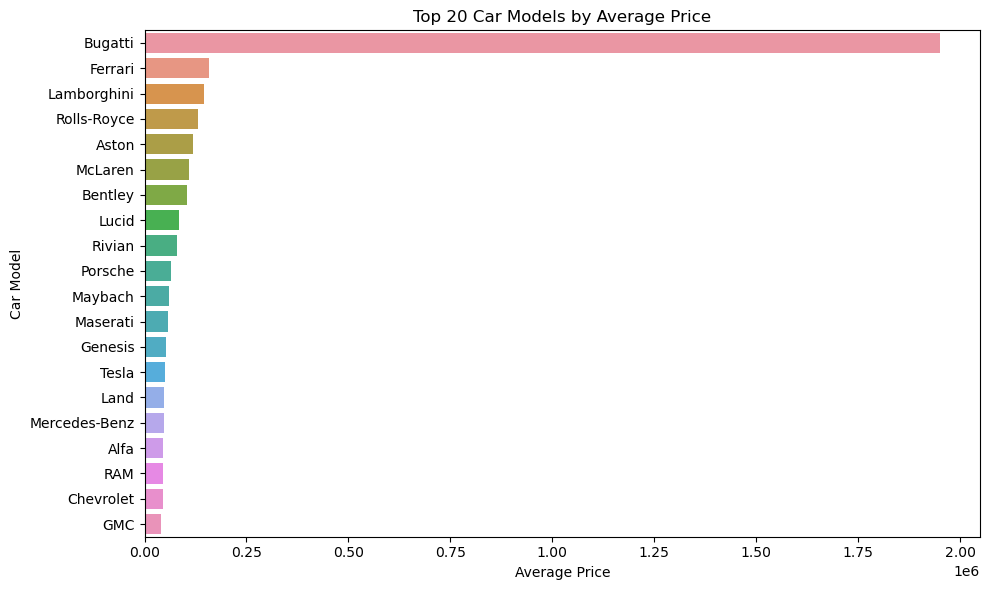

In [17]:
# Calculate average price for each car brand
avg_prices_by_car = car_df.groupby('brand')['price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

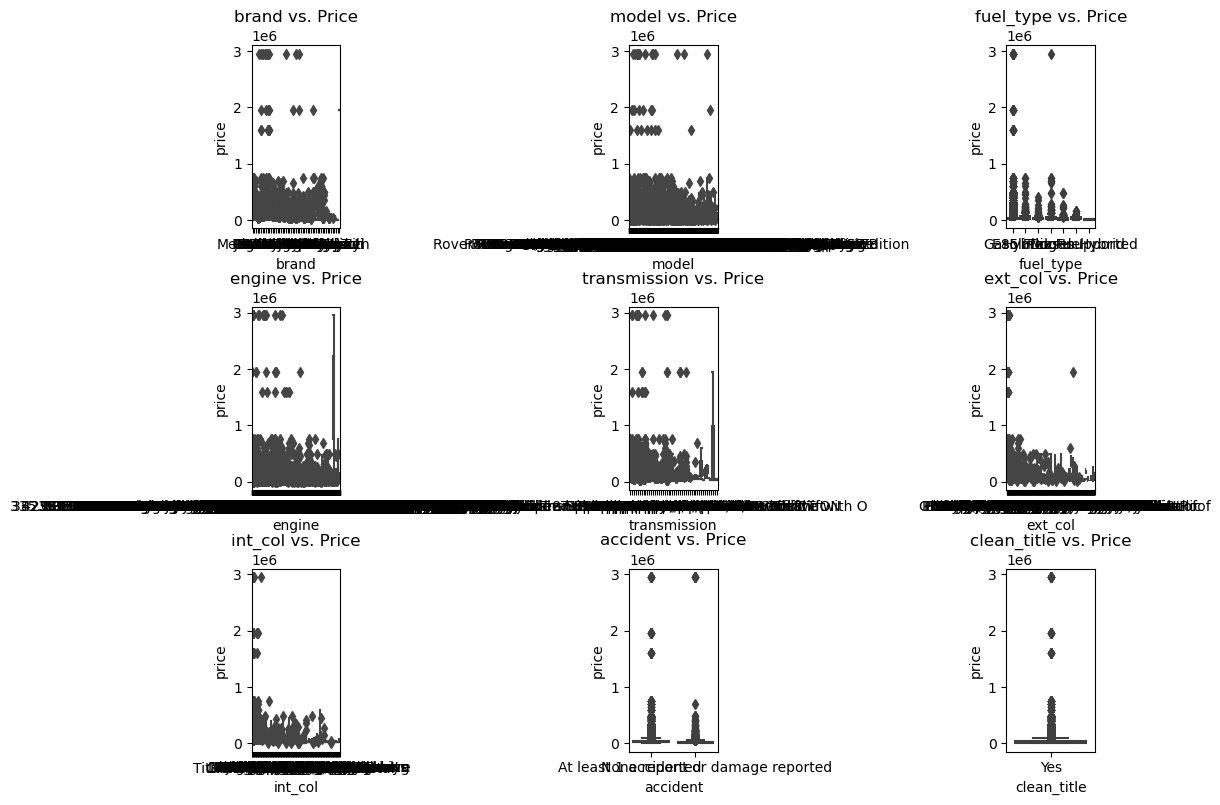

In [18]:
# Categorical Feature vs. Price
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=car_df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

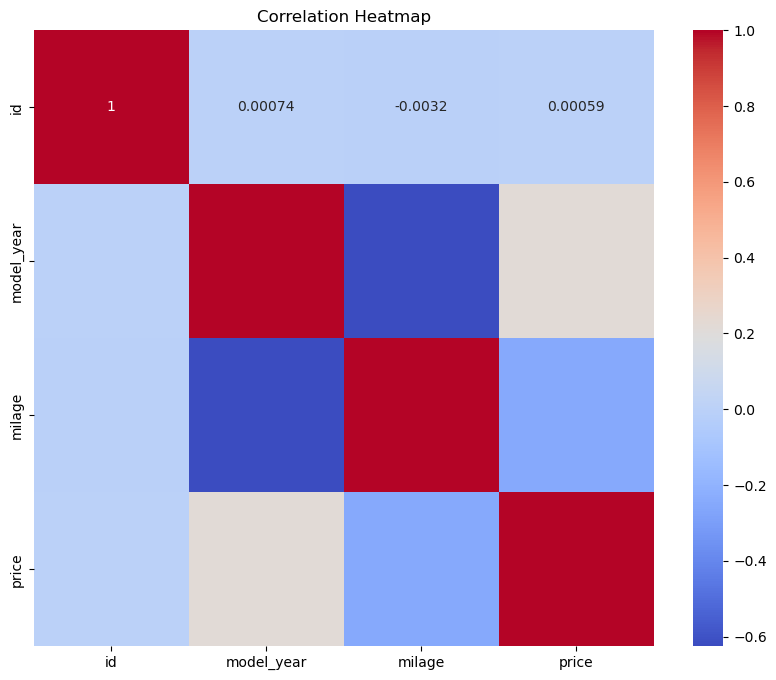

In [19]:
# Correlation Analysis
correlation_matrix = car_df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# Define categorical and numerical columns
categorical_columns = ['brand', 'model','fuel_type', 'engine', 'transmission','ext_col', 'int_col','accident','clean_title']
numerical_columns =['id', 'model_year', 'milage', 'price']

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
   car_df[column] = label_encoder.fit_transform(car_df[column])

# Feature engineering
#for column in numerical_columns:
 #  car_df[f'{column}'] = car_df[column] ** 2

# Feature scaling
#scaler = StandardScaler()
#car_df[numerical_columns] = scaler.fit_transform(car_df[numerical_columns])

In [21]:
# Splitting the dataset
X = car_df.drop(['price'], axis=1)
y = car_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [22]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.16471728635094263
Mean Squared Error: 2454478730.321439


In [23]:
#rms = mean_squared_error(y_test, y_pred, squared=False)
rms = sqrt(mean_squared_error(y_test, y_pred))
print(f' Root Mean Squared Error: {rms}')

 Root Mean Squared Error: 49542.696034041575


In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
42508,64000,78477.078137,-14477.078137
43045,145000,78933.167060,66066.832940
34855,6995,-2815.792637,9810.792637
15207,24700,25302.104104,-602.104104
39125,6700,-2560.308956,9260.308956
...,...,...,...
34708,17500,41685.716624,-24185.716624
42401,47999,70915.663718,-22916.663718
50625,89000,74635.748863,14364.251137
29071,34000,49272.112952,-15272.112952


In [25]:
submission_preds = model.predict(test_df)

ValueError: could not convert string to float: 'Mercedes-Benz'

In [ ]:
car_df = pd.DataFrame({"id":test_ids.values,
                   "price":submission_preds,
                  })

In [ ]:
car_df.to_csv("submission.csv", index = False)